In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from .dat files
# 600 seconds

t600_22Na = np.genfromtxt('NaI_22Na_600s.dat', names=True)
t600_60Co = np.genfromtxt('NaI_60Co_600s.dat', names=True)
t600_137Cs = np.genfromtxt('NaI_137Cs_600s.dat', names=True)
t600_fondo = np.genfromtxt('NaI_Fondo_600s.dat', names=True)
x_values_22Na = [x[0] for x in t600_22Na]
y_values_22Na = [x[1] for x in t600_22Na]
x_values_60Co = [x[0] for x in t600_60Co]
y_values_60Co = [x[1] for x in t600_60Co]
x_values_137Cs = [x[0] for x in t600_137Cs]
y_values_137Cs = [x[1] for x in t600_137Cs]
x_values_fondo = [x[0] for x in t600_fondo]
y_values_fondo = [x[1] for x in t600_fondo]

# 300 seconds
t300_57Co = np.genfromtxt('NaI_57Co_300s.dat', names=True)
t300_fondo = np.genfromtxt('NaI_Fondo_300s.dat', names=True)
x_values_57Co = [x[0] for x in t300_57Co]
y_values_57Co = [x[1] for x in t300_57Co]
x_values_fondo_300 = [x[0] for x in t300_fondo]
y_values_fondo_300 = [x[1] for x in t300_fondo]

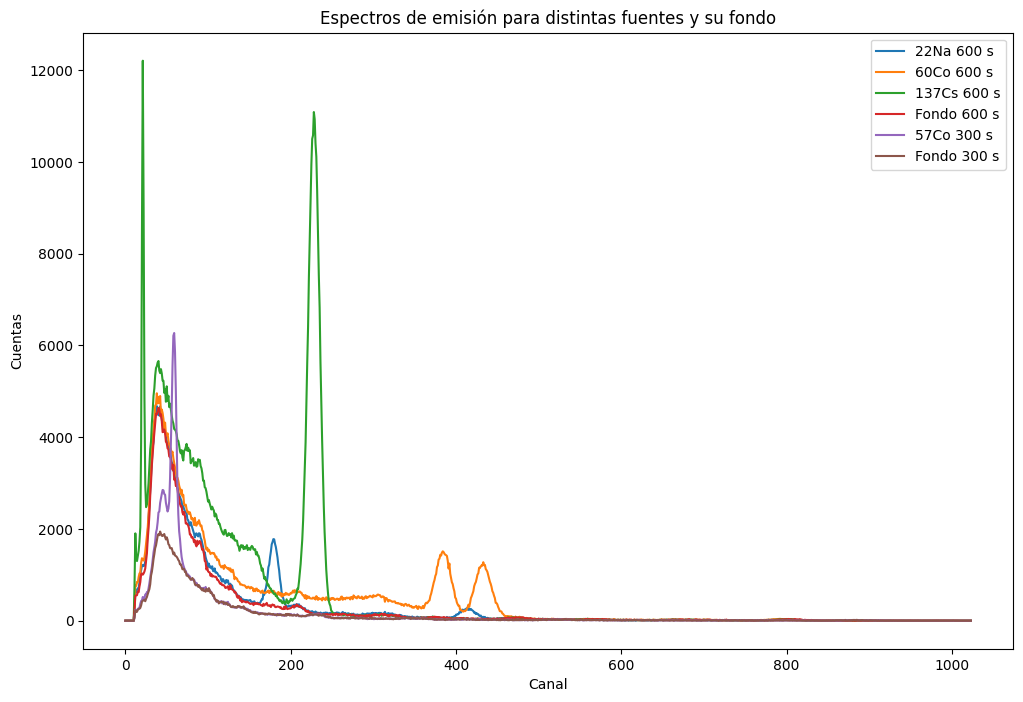

In [2]:
## Preparación

#punto 1: graficar espectros
plt.figure(figsize=(12, 8))
plt.plot(x_values_22Na,y_values_22Na, label='22Na 600 s')
plt.plot(x_values_60Co,y_values_60Co, label='60Co 600 s')
plt.plot(x_values_137Cs,y_values_137Cs, label='137Cs 600 s')
plt.plot(x_values_fondo,y_values_fondo, label='Fondo 600 s')
plt.plot(x_values_57Co,y_values_57Co, label='57Co 300 s')
plt.plot(x_values_fondo_300,y_values_fondo_300, label='Fondo 300 s')
plt.title('Espectros de emisión para distintas fuentes y su fondo')
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.legend()
plt.show()

In [3]:
# Punto 2: Resta del fondo
y_values_22Na = [a - b for a, b in zip(y_values_22Na, y_values_fondo)]
y_values_60Co = [a - b for a, b in zip(y_values_60Co, y_values_fondo)]
y_values_137Cs = [a - b for a, b in zip(y_values_137Cs, y_values_fondo)]

y_values_57Co = [a - b for a, b in zip(y_values_57Co, y_values_fondo_300)]

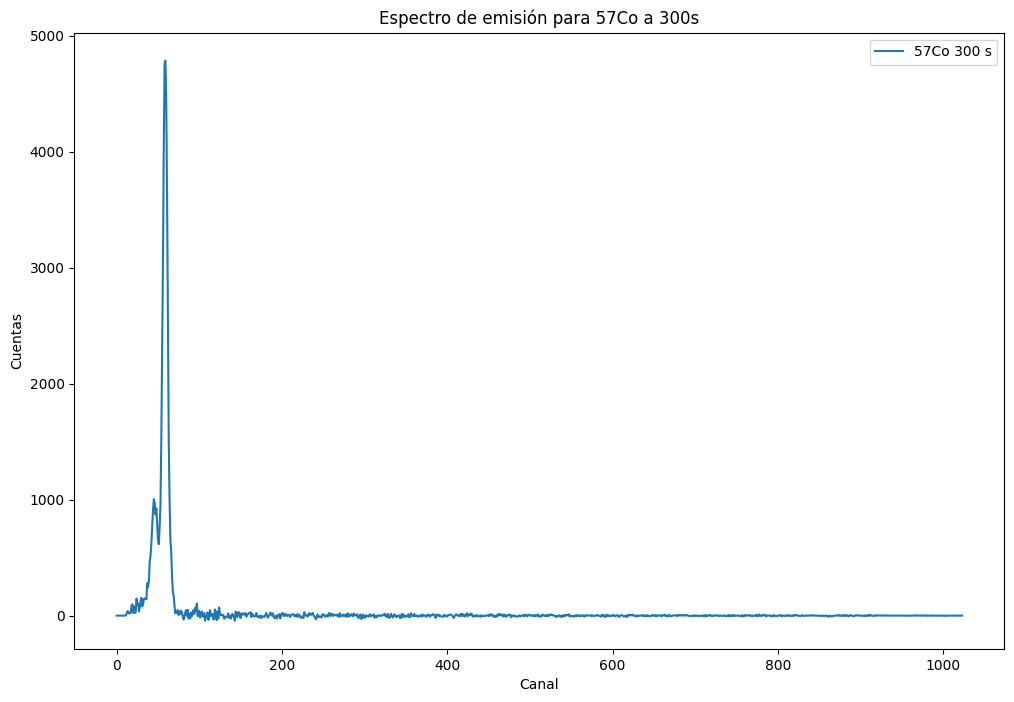

In [4]:
# Punto 3: Espectro 57Co a 300s "Limpiado"
plt.figure(figsize=(12, 8))
plt.plot(x_values_57Co,y_values_57Co, label='57Co 300 s')
plt.title('Espectro de emisión para 57Co a 300s')
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.legend()
plt.show()

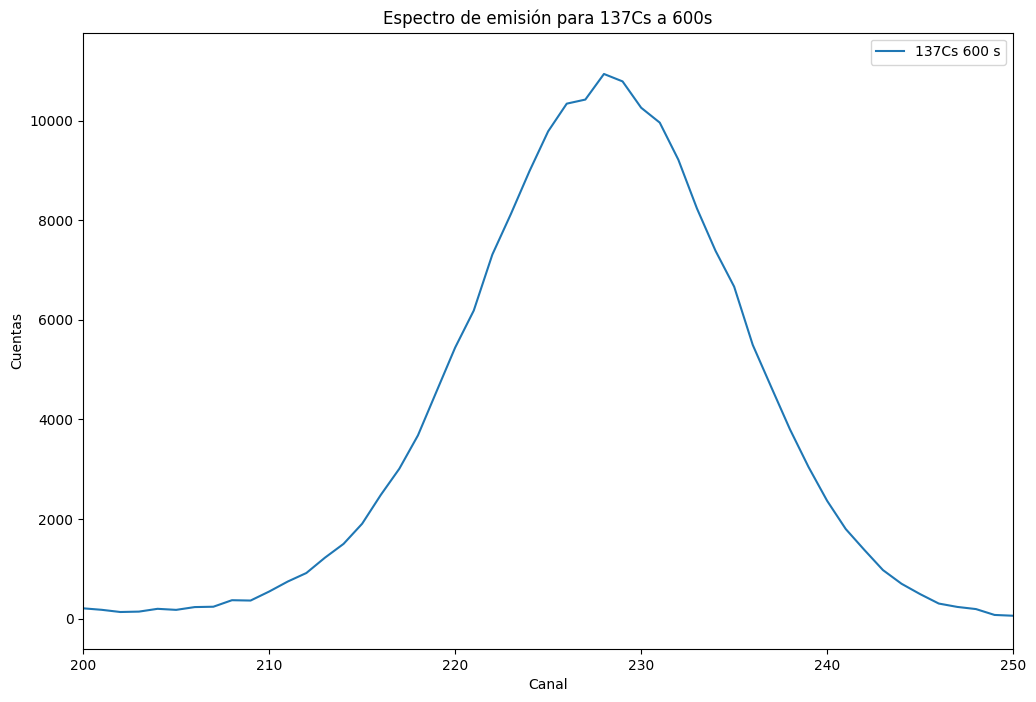

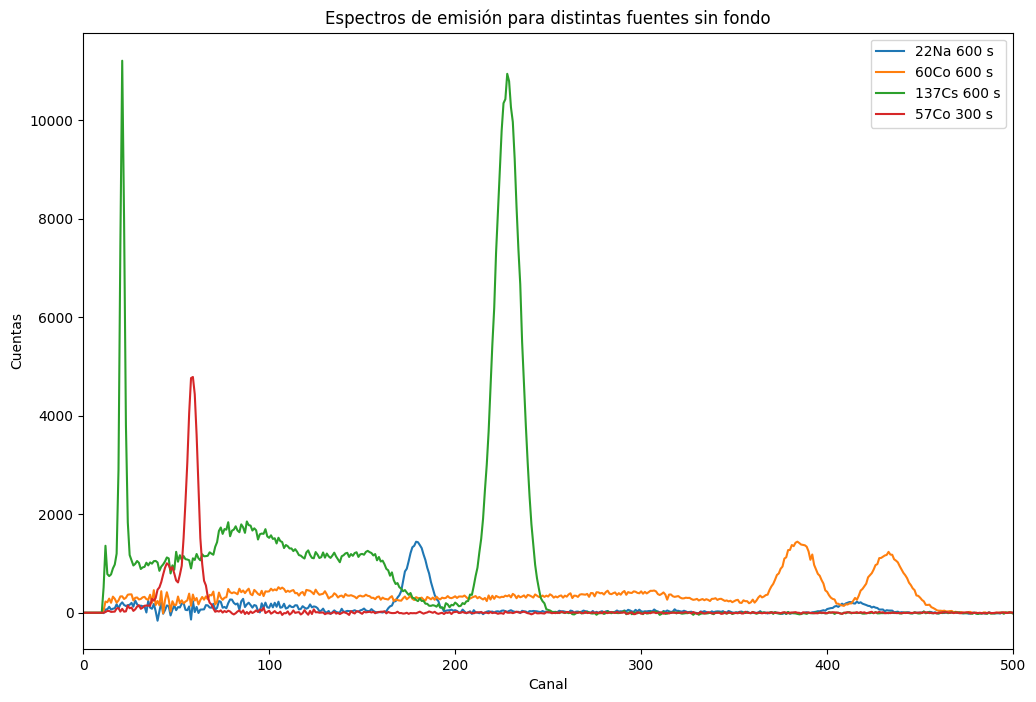

In [5]:
# Punto 4: Espectro 22Na a 600s "Limpiado"

plt.figure(figsize=(12, 8))
plt.plot(x_values_137Cs,y_values_137Cs, label='137Cs 600 s')
plt.title('Espectro de emisión para 137Cs a 600s')
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.xlim(right=250,left=200)
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(x_values_22Na,y_values_22Na, label='22Na 600 s')
plt.plot(x_values_60Co,y_values_60Co, label='60Co 600 s')
plt.plot(x_values_137Cs,y_values_137Cs, label='137Cs 600 s')
plt.plot(x_values_57Co,y_values_57Co, label='57Co 300 s')
plt.title('Espectros de emisión para distintas fuentes sin fondo')
plt.xlim(right=500,left=0)
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.legend()
plt.show()

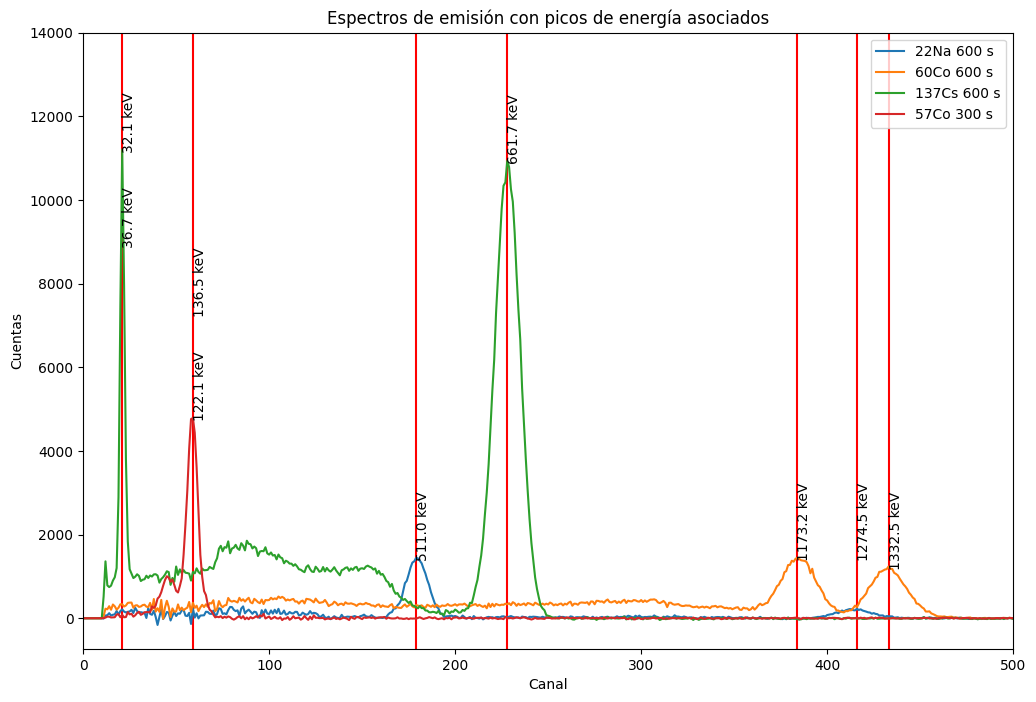

In [6]:
# Punto 5: Calibración de picos

p_22Na_1 = 1274.537
p_60Co_1 = 1173.228
p_60Co_2 = 1332.490
p_137Cs_1 = 661.657
p_137Cs_alfa = 32.06
p_137Cs_beta = 36.66
p_57Co_1 = 122.06065
p_57Co_2 = 136.47350
p_electron = 511

max_i_22Na = y_values_22Na[400:].index(max(y_values_22Na[400:])) + 400
max_x_22Na = x_values_22Na[max_i_22Na]

max_i_22Na_e = y_values_22Na[100:200].index(max(y_values_22Na[100:200])) + 100
max_x_22Na_e = x_values_22Na[max_i_22Na_e]

# Para los índices 300-400
max_i_60Co_1 = y_values_60Co[300:400].index(max(y_values_60Co[300:400])) + 300
max_x_60Co_1 = x_values_60Co[max_i_60Co_1]
# Para los índices 400 en adelante
max_i_60Co_2 = y_values_60Co[400:].index(max(y_values_60Co[400:])) + 400
max_x_60Co_2 = x_values_60Co[max_i_60Co_2]

max_i_137Cs_1 = y_values_137Cs[:100].index(max(y_values_137Cs[:100]))
max_x_137Cs_1 = x_values_137Cs[max_i_137Cs_1]

max_i_137Cs_2 = y_values_137Cs[200:300].index(max(y_values_137Cs[200:300])) + 200
max_x_137Cs_2 = x_values_137Cs[max_i_137Cs_2]

max_i_57Co_1 = y_values_57Co[:100].index(max(y_values_57Co[:100]))
max_x_57Co_1 = x_values_57Co[max_i_57Co_1]

plt.figure(figsize=(12, 8))

plt.axvline(x=max_x_22Na, color='r')
plt.axvline(x=max_x_22Na_e, color='r')
plt.axvline(x=max_x_60Co_1, color='r')
plt.axvline(x=max_x_60Co_2, color='r')
plt.axvline(x=max_x_137Cs_1, color='r')
plt.axvline(x=max_x_137Cs_2, color='r')
plt.axvline(x=max_x_57Co_1, color='r')

plt.plot(x_values_22Na,y_values_22Na, label='22Na 600 s')
plt.plot(x_values_60Co, y_values_60Co, label='60Co 600 s')
plt.plot(x_values_137Cs, y_values_137Cs, label='137Cs 600 s')
plt.plot(x_values_57Co, y_values_57Co, label='57Co 300 s')

plt.text(max_x_22Na, max(y_values_22Na), "{:.1f} keV".format(p_22Na_1), rotation=90)
plt.text(max_x_22Na_e, max(y_values_22Na[100:200]), "{:.1f} keV".format(p_electron), rotation=90)
plt.text(max_x_60Co_1, max(y_values_60Co[300:400]), "{:.1f} keV".format(p_60Co_1), rotation=90)
plt.text(max_x_60Co_2, max(y_values_60Co[400:]), "{:.1f} keV".format(p_60Co_2), rotation=90)
plt.text(max_x_137Cs_1, max(y_values_137Cs[:100]), "{:.1f} keV".format(p_137Cs_alfa), rotation=90)
plt.text(max_x_137Cs_1, max(y_values_137Cs[200:300])-2000, "{:.1f} keV".format(p_137Cs_beta), rotation=90)
plt.text(max_x_137Cs_2, max(y_values_137Cs[200:300]), "{:.1f} keV".format(p_137Cs_1), rotation=90)
plt.text(max_x_57Co_1, max(y_values_57Co[:100]), "{:.1f} keV".format(p_57Co_1), rotation=90)
plt.text(max_x_57Co_1, max(y_values_57Co[:100])+2500, "{:.1f} keV".format(p_57Co_2), rotation=90)

plt.xlim(right=500,left=0)
plt.ylim(top=14000)

plt.title('Espectros de emisión con picos de energía asociados')

plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.legend()
plt.show()

Parametros gaussiana 22Na: 208.6, 414.4, 9.7 (a,x0,sigma)
Matriz de covarianzas:
[[ 2.05645895e+03  4.05882361e-05 -6.34452709e+01]
 [ 4.05882361e-05  5.87218510e+00 -1.87521163e-06]
 [-6.34452709e+01 -1.87521163e-06  5.87218501e+00]]
Parametros gaussiana 22Na_e: 1427.1, 179.5, 5.9 (a,x0,sigma)
Matriz de covarianzas:
[[ 4.73740369e+02  5.91780348e-07 -1.30700184e+00]
 [ 5.91780348e-07  1.08176585e-02 -2.45031432e-09]
 [-1.30700184e+00 -2.45031432e-09  1.08176585e-02]]
El valor de FWHM para la gaussiana f_22Na_1 es: 14.00
El valor de FWHM para la gaussiana f_22Na_2 es: 22.00


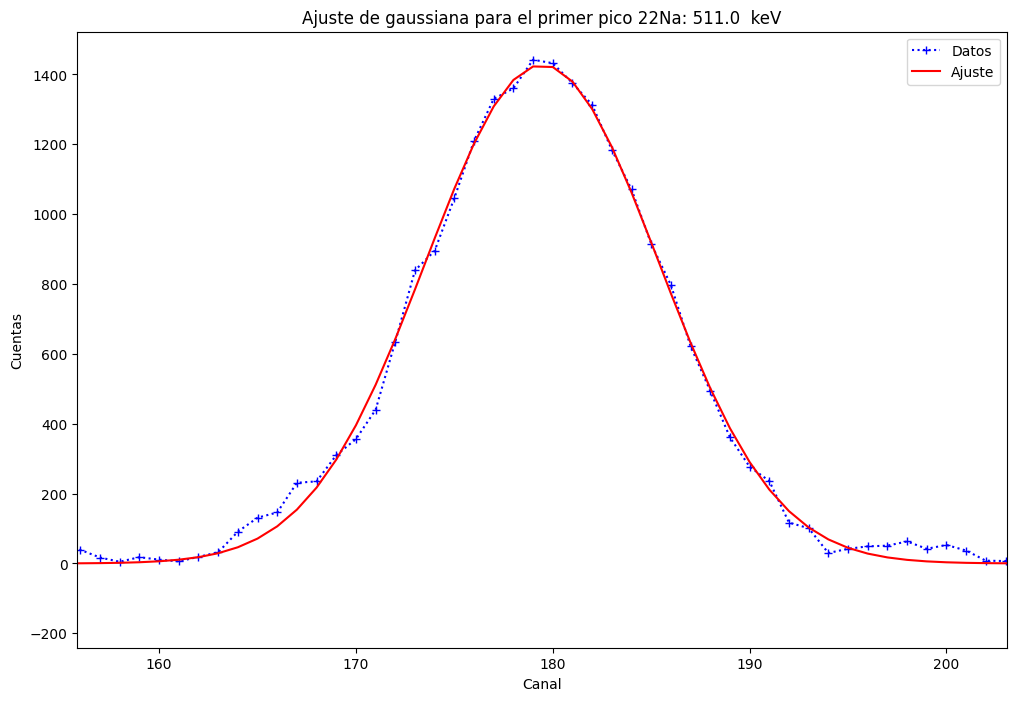

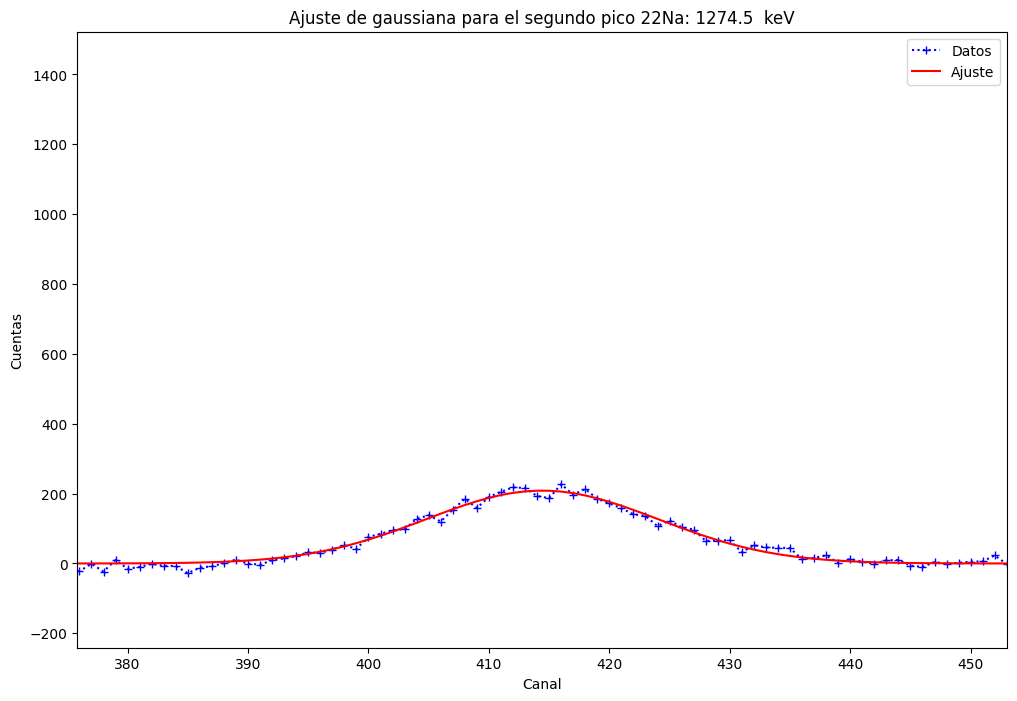

La intensidad para el primer pico de 22Na es: 21126.111242251573
La intensidad para el segundo pico de 22Na es: 5046.969460445886


In [7]:
# Punto 6: Ajustes de gaussiana
# ANALISIS

# Punto 1: Ajuste de gaussianas
# Punto 1.1: Ajuste de gaussiana para 22Na
from scipy.optimize import curve_fit
from numpy import trapz
import pandas as pd
from scipy.stats import linregress

def gaussiana(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

x_values_22Na = np.array(x_values_22Na)
y_values_22Na = np.array(y_values_22Na)

popt_22Na, pcov_22Na = curve_fit(gaussiana, x_values_22Na, y_values_22Na, p0=[max(y_values_22Na), max_x_22Na, 10])  
print(f"Parametros gaussiana 22Na: {popt_22Na[0]:.1f}, {popt_22Na[1]:.1f}, {popt_22Na[2]:.1f} (a,x0,sigma)")
print("Matriz de covarianzas:")
print(pcov_22Na)

popt_22Na_e, pcov_22Na_e = curve_fit(gaussiana, x_values_22Na, y_values_22Na, p0=[max(y_values_22Na[100:200]), max_x_22Na_e, 10])
print(f"Parametros gaussiana 22Na_e: {popt_22Na_e[0]:.1f}, {popt_22Na_e[1]:.1f}, {popt_22Na_e[2]:.1f} (a,x0,sigma)")
print("Matriz de covarianzas:")
print(pcov_22Na_e)

def fwhm(x, y):
    half_max = max(y) / 2.
    # find when function crosses line half_max (when sign of diff flips)
    # take the 'derivative' of signum(half_max - y[])
    d = np.sign(half_max - np.array(y[0:-1])) - np.sign(half_max - np.array(y[1:]))
    # find the left and right most indexes
    left_idx = np.where(d > 0)[0][0]
    right_idx = np.where(d < 0)[0][0]
    return abs(x[right_idx] - x[left_idx])

f_22Na_1 = gaussiana(x_values_22Na, *popt_22Na_e)
f_22Na_2 = gaussiana(x_values_22Na, *popt_22Na)

fwhm_22Na_1 = fwhm(x_values_22Na, f_22Na_1)
print(f"El valor de FWHM para la gaussiana f_22Na_1 es: {fwhm_22Na_1:.2f}")
fwhm_22Na_2 = fwhm(x_values_22Na, f_22Na_2)
print(f"El valor de FWHM para la gaussiana f_22Na_2 es: {fwhm_22Na_2:.2f}")

plt.figure(figsize=(12, 8))
plt.plot(x_values_22Na, y_values_22Na, 'b+:', label='Datos')
plt.plot(x_values_22Na, f_22Na_1, 'r-', label='Ajuste')
plt.legend()
plt.title(f'Ajuste de gaussiana para el primer pico 22Na: {p_electron:.1f}  keV')
plt.xlim([popt_22Na_e[1]-4*popt_22Na_e[2], popt_22Na_e[1]+4*popt_22Na_e[2]])
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(x_values_22Na, y_values_22Na, 'b+:', label='Datos')
plt.plot(x_values_22Na, f_22Na_2, 'r-', label='Ajuste')
plt.legend()
plt.title(f'Ajuste de gaussiana para el segundo pico 22Na: {p_22Na_1:.1f}  keV')
plt.xlim([popt_22Na[1]-4*popt_22Na[2], popt_22Na[1]+4*popt_22Na[2]])
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()


integral_f_22Na_1 = trapz(f_22Na_1, x_values_22Na)
print(f"La intensidad para el primer pico de 22Na es: {integral_f_22Na_1}")
integral_f_22Na_2 = trapz(f_22Na_2, x_values_22Na)
print(f"La intensidad para el segundo pico de 22Na es: {integral_f_22Na_2}")

Parametros gaussiana 60Co_1: 1342.3, 384.3, 11.6 (a,x0,sigma)
Matriz de covarianzas:
[[ 4.67102169e+03  1.33230073e-05 -2.68747534e+01]
 [ 1.33230073e-05  4.63872216e-01 -1.14880291e-07]
 [-2.68747534e+01 -1.14880291e-07  4.63872206e-01]]
Parametros gaussiana 60Co_2: 1133.9, 432.3, 11.1 (a,x0,sigma)
Matriz de covarianzas:
[[ 5.72112437e+03  2.16535968e-05 -3.74696287e+01]
 [ 2.16535968e-05  7.36204827e-01 -2.13629053e-07]
 [-3.74696287e+01 -2.13629053e-07  7.36204813e-01]]
El valor de FWHM para la gaussiana f_60Co_1 es: 27.00
El valor de FWHM para la gaussiana f_60Co_2 es: 26.00


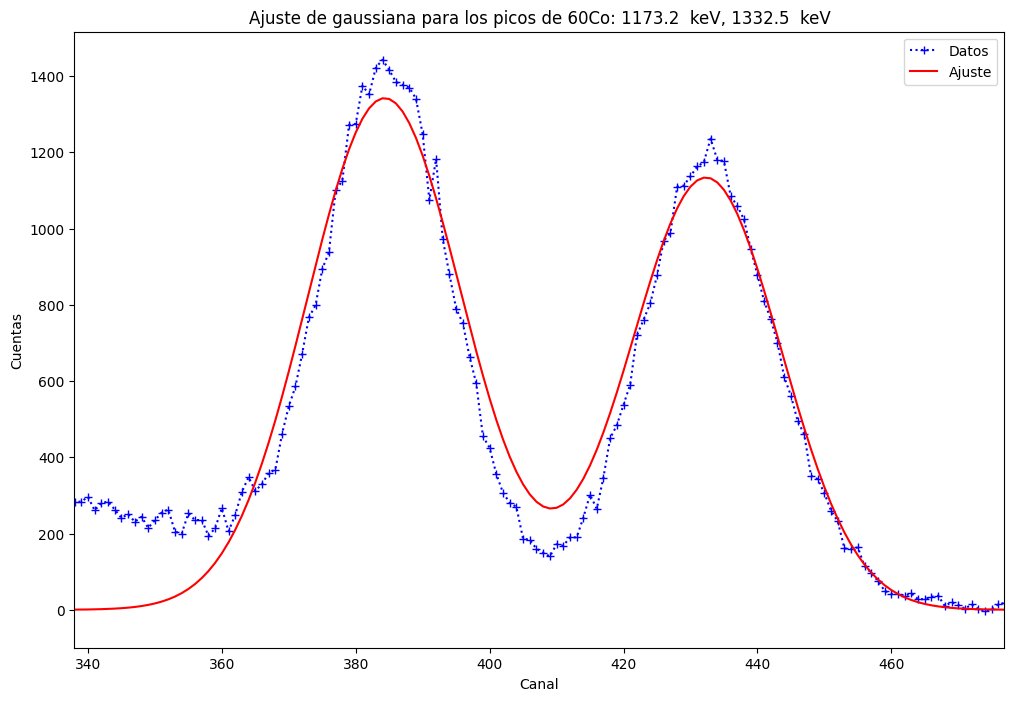

La intensidad para el primer pico de 60Co es: 38984.29323617257
La intensidad para el segundo pico de 60Co es: 31671.055746311948


In [8]:
# Punto 1.2: Ajuste de gaussiana para 60Co

x_values_60Co = np.array(x_values_60Co)
y_values_60Co = np.array(y_values_60Co)

popt_60Co_1, pcov_60Co_1 = curve_fit(gaussiana, x_values_60Co, y_values_60Co, p0=[max(y_values_60Co[300:400]), max_x_60Co_1, 10])
print(f"Parametros gaussiana 60Co_1: {popt_60Co_1[0]:.1f}, {popt_60Co_1[1]:.1f}, {popt_60Co_1[2]:.1f} (a,x0,sigma)")
print("Matriz de covarianzas:")
print(pcov_60Co_1)

popt_60Co_2, pcov_60Co_2 = curve_fit(gaussiana, x_values_60Co, y_values_60Co, p0=[max(y_values_60Co[400:]), max_x_60Co_2, 10])
print(f"Parametros gaussiana 60Co_2: {popt_60Co_2[0]:.1f}, {popt_60Co_2[1]:.1f}, {popt_60Co_2[2]:.1f} (a,x0,sigma)")
print("Matriz de covarianzas:")
print(pcov_60Co_2)

f_60Co_1 = gaussiana(x_values_60Co, *popt_60Co_1)
f_60Co_2 = gaussiana(x_values_60Co, *popt_60Co_2)
fit_60Co = f_60Co_1 + f_60Co_2

fwhm_60Co_1 = fwhm(x_values_60Co, f_60Co_1)
print(f"El valor de FWHM para la gaussiana f_60Co_1 es: {fwhm_60Co_1:.2f}")
fwhm_60Co_2 = fwhm(x_values_60Co, f_60Co_2)
print(f"El valor de FWHM para la gaussiana f_60Co_2 es: {fwhm_60Co_2:.2f}")

plt.figure(figsize=(12, 8))
plt.plot(x_values_60Co, y_values_60Co, 'b+:', label='Datos')
plt.plot(x_values_60Co, fit_60Co, 'r-', label='Ajuste')
plt.legend()
plt.title(f'Ajuste de gaussiana para los picos de 60Co: {p_60Co_1:.1f}  keV, {p_60Co_2:.1f}  keV')
plt.xlim([popt_60Co_1[1]-4*popt_60Co_1[2], popt_60Co_2[1]+4*popt_60Co_2[2]])
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

integral_f_60Co_1 = trapz(f_60Co_1, x_values_60Co)
print(f"La intensidad para el primer pico de 60Co es: {integral_f_60Co_1}")
integral_f_60Co_2 = trapz(f_60Co_2, x_values_60Co)
print(f"La intensidad para el segundo pico de 60Co es: {integral_f_60Co_2}")

Parametros gaussiana 137Cs_1: 10556.1, 21.1, 1.4 (a,x0,sigma)
Matriz de covarianzas:
[[ 1.00037837e+06  1.47906648e-04 -8.68014817e+01]
 [ 1.47906648e-04  2.25952819e-02 -3.41467941e-08]
 [-8.68014817e+01 -3.41467941e-08  2.25950829e-02]]
Parametros gaussiana 137Cs_2: 10744.7, 228.1, 6.9 (a,x0,sigma)
Matriz de covarianzas:
[[ 6.11181590e+04  1.29492001e-05 -2.62830750e+01]
 [ 1.29492001e-05  3.39080916e-02 -8.32578271e-09]
 [-2.62830750e+01 -8.32578271e-09  3.39080916e-02]]
El valor de FWHM para la gaussiana f_137Cs_1 es: 3.00
El valor de FWHM para la gaussiana f_137Cs_2 es: 17.00


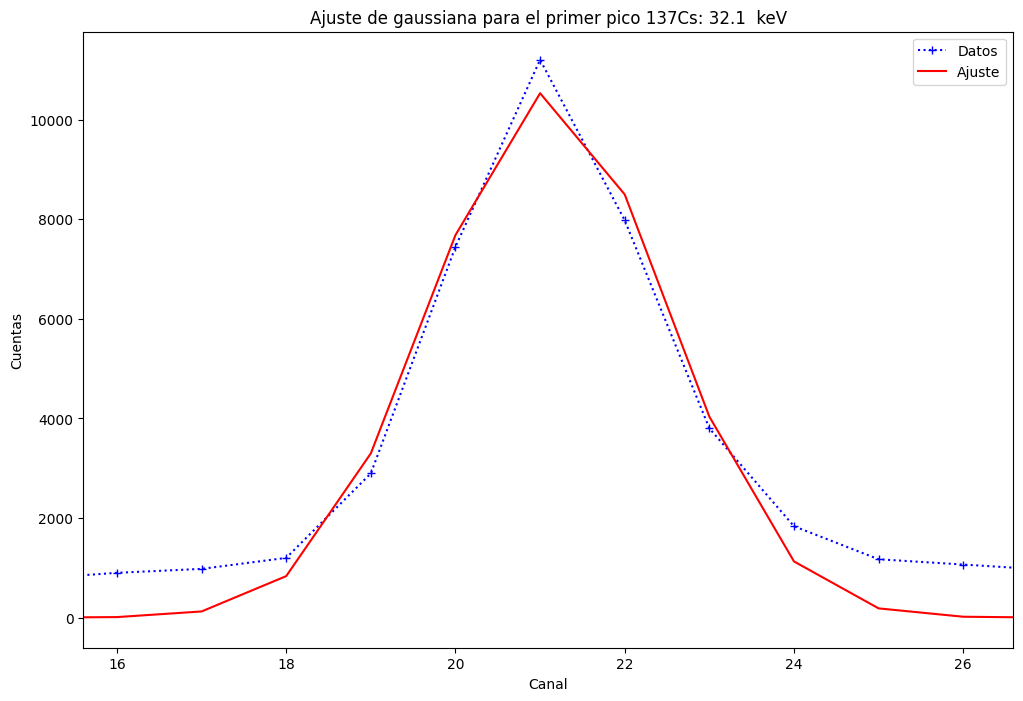

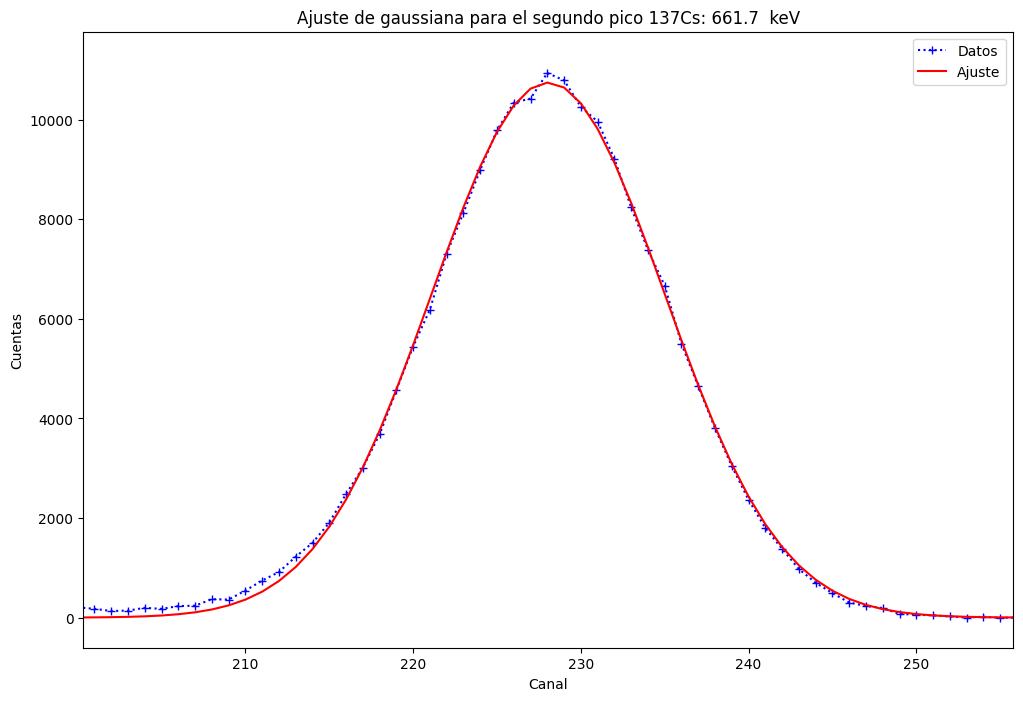

La intensidad para el primer pico de 137Cs es: 36346.633864402844
La intensidad para el segundo pico de 137Cs es: 186677.316880683


In [9]:
# Punto 1.3: Ajuste de gaussiana para 137Cs

x_values_137Cs = np.array(x_values_137Cs)
y_values_137Cs = np.array(y_values_137Cs)

popt_137Cs_1, pcov_137Cs_1 = curve_fit(gaussiana, x_values_137Cs, y_values_137Cs, p0=[max(y_values_137Cs[:100]), max_x_137Cs_1, 10])
print(f"Parametros gaussiana 137Cs_1: {popt_137Cs_1[0]:.1f}, {popt_137Cs_1[1]:.1f}, {popt_137Cs_1[2]:.1f} (a,x0,sigma)")
print("Matriz de covarianzas:")
print(pcov_137Cs_1)

popt_137Cs_2, pcov_137Cs_2 = curve_fit(gaussiana, x_values_137Cs, y_values_137Cs, p0=[max(y_values_137Cs[200:300]), max_x_137Cs_2, 10])
print(f"Parametros gaussiana 137Cs_2: {popt_137Cs_2[0]:.1f}, {popt_137Cs_2[1]:.1f}, {popt_137Cs_2[2]:.1f} (a,x0,sigma)")
print("Matriz de covarianzas:")
print(pcov_137Cs_2)

f_137Cs_1 = gaussiana(x_values_137Cs, *popt_137Cs_1)
f_137Cs_2 = gaussiana(x_values_137Cs, *popt_137Cs_2)
fit_137Cs = f_137Cs_1 + f_137Cs_2

fwhm_137Cs_1 = fwhm(x_values_137Cs, f_137Cs_1)
print(f"El valor de FWHM para la gaussiana f_137Cs_1 es: {fwhm_137Cs_1:.2f}")
fwhm_137Cs_2 = fwhm(x_values_137Cs, f_137Cs_2)
print(f"El valor de FWHM para la gaussiana f_137Cs_2 es: {fwhm_137Cs_2:.2f}")

plt.figure(figsize=(12, 8))
plt.plot(x_values_137Cs, y_values_137Cs, 'b+:', label='Datos')
plt.plot(x_values_137Cs, f_137Cs_1, 'r-', label='Ajuste')
plt.legend()
plt.title(f'Ajuste de gaussiana para el primer pico 137Cs: {p_137Cs_alfa:.1f}  keV')
plt.xlim([popt_137Cs_1[1]-4*popt_137Cs_1[2], popt_137Cs_1[1]+4*popt_137Cs_1[2]])
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(x_values_137Cs, y_values_137Cs, 'b+:', label='Datos')
plt.plot(x_values_137Cs, f_137Cs_2, 'r-', label='Ajuste')
plt.legend()
plt.title(f'Ajuste de gaussiana para el segundo pico 137Cs: {p_137Cs_1:.1f}  keV')
plt.xlim([popt_137Cs_2[1]-4*popt_137Cs_2[2], popt_137Cs_2[1]+4*popt_137Cs_2[2]])
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

integral_f_137Cs_1 = trapz(f_137Cs_1, x_values_137Cs)
print(f"La intensidad para el primer pico de 137Cs es: {integral_f_137Cs_1}")
integral_f_137Cs_2 = trapz(f_137Cs_2, x_values_137Cs)
print(f"La intensidad para el segundo pico de 137Cs es: {integral_f_137Cs_2}")

Parametros gaussiana 57Co_1: 4700.1, 58.6, 3.2 (a,x0,sigma)
Matriz de covarianzas:
[[ 2.07536319e+03  2.57496291e-07 -9.28287329e-01]
 [ 2.57496291e-07  1.24563845e-03 -1.73404930e-10]
 [-9.28287329e-01 -1.73404930e-10  1.24563843e-03]]
El valor de FWHM para la gaussiana f_57Co_1 es: 8.00


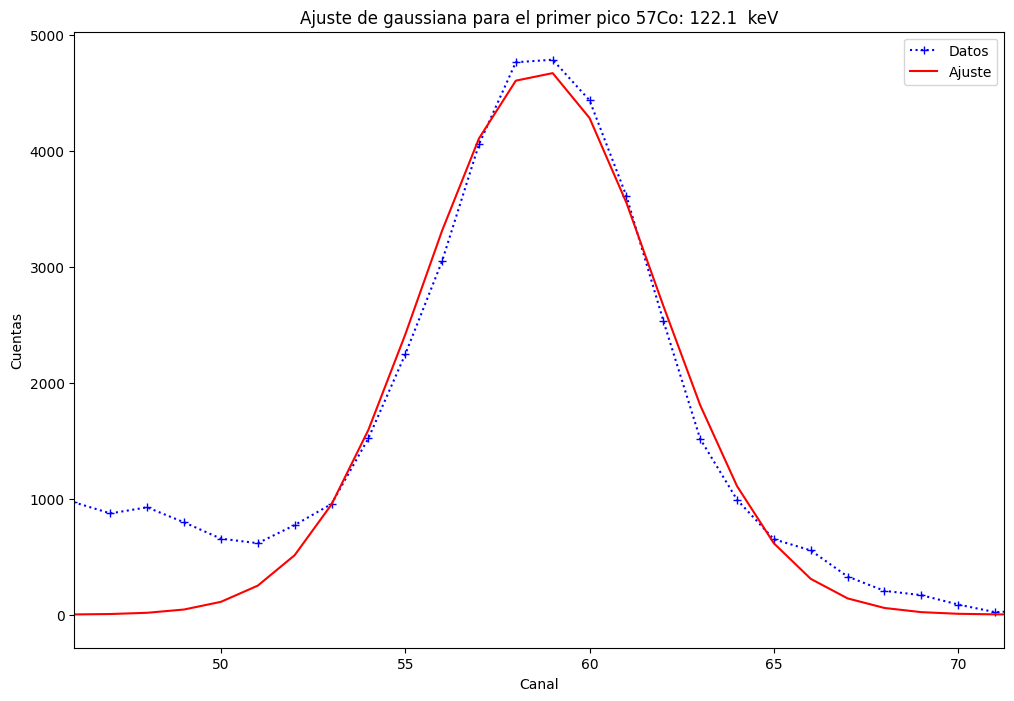

La intensidad para el primer pico de 57Co es: 37151.25499626328
                    a          mu      sigma  FWHM              I           E
22Na_1    1427.074953  179.460312   5.905856  22.0    5046.969460   511.00000
22Na_2     208.595386  414.421457   9.652416  14.0   21126.111242  1274.53700
60Co_1    1342.302594  384.321839  11.586421  27.0   38984.293236  1173.22800
60Co_2    1133.885676  432.323255  11.143031  26.0   31671.055746  1332.49000
137Cs_1  10556.059789   21.095129   1.373638   3.0   36346.633864    32.06000
137Cs_2  10744.724822  228.050111   6.931166  17.0  186677.316881   661.65700
57Co      4700.086970   58.639415   3.153390   8.0   37151.254996   122.06065


In [10]:
# Punto 1.4: Ajuste de gaussiana para 57Co

x_values_57Co = np.array(x_values_57Co)
y_values_57Co = np.array(y_values_57Co)

popt_57Co_1, pcov_57Co_1 = curve_fit(gaussiana, x_values_57Co, y_values_57Co, p0=[max(y_values_57Co[:100]), max_x_57Co_1, 10])
print(f"Parametros gaussiana 57Co_1: {popt_57Co_1[0]:.1f}, {popt_57Co_1[1]:.1f}, {popt_57Co_1[2]:.1f} (a,x0,sigma)")
print("Matriz de covarianzas:")
print(pcov_57Co_1)

f_57Co_1 = gaussiana(x_values_57Co, *popt_57Co_1)

fwhm_57Co_1 = fwhm(x_values_57Co, f_57Co_1)
print(f"El valor de FWHM para la gaussiana f_57Co_1 es: {fwhm_57Co_1:.2f}")

plt.figure(figsize=(12, 8))
plt.plot(x_values_57Co, y_values_57Co, 'b+:', label='Datos')
plt.plot(x_values_57Co, f_57Co_1, 'r-', label='Ajuste')
plt.legend()
plt.title(f'Ajuste de gaussiana para el primer pico 57Co: {p_57Co_1:.1f}  keV')
plt.xlim([popt_57Co_1[1]-4*popt_57Co_1[2], popt_57Co_1[1]+4*popt_57Co_1[2]])
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

integral_f_57Co_1 = trapz(f_57Co_1, x_values_57Co)
print(f"La intensidad para el primer pico de 57Co es: {integral_f_57Co_1}")

# Crear una tabla para colocar los valores de los parámetros popt, fwhm e integral_f

data = {'a': [popt_22Na_e[0], popt_22Na[0], popt_60Co_1[0], popt_60Co_2[0], popt_137Cs_1[0], popt_137Cs_2[0], popt_57Co_1[0]],
    'mu': [popt_22Na_e[1], popt_22Na[1], popt_60Co_1[1], popt_60Co_2[1], popt_137Cs_1[1], popt_137Cs_2[1], popt_57Co_1[1]],
    'sigma': [popt_22Na_e[2], popt_22Na[2], popt_60Co_1[2], popt_60Co_2[2], popt_137Cs_1[2], popt_137Cs_2[2], popt_57Co_1[2]],
    'FWHM': [fwhm_22Na_2, fwhm_22Na_1, fwhm_60Co_1, fwhm_60Co_2, fwhm_137Cs_1, fwhm_137Cs_2, fwhm_57Co_1],
    'I': [integral_f_22Na_2, integral_f_22Na_1, integral_f_60Co_1, integral_f_60Co_2, integral_f_137Cs_1, integral_f_137Cs_2, integral_f_57Co_1],
    'E': [p_electron, p_22Na_1, p_60Co_1, p_60Co_2, p_137Cs_alfa, p_137Cs_1, p_57Co_1]}

df = pd.DataFrame(data, index=['22Na_1','22Na_2', '60Co_1', '60Co_2', '137Cs_1', '137Cs_2', '57Co'])
print(df)

b0 = -55.19
b1 = 3.20
El error relativo de la calibración es: 0.01
Resultados de los parametros de la recta de ajuste:
a0 (keV)	a1(keV/canal)
-55.19 +/- 3.26	3.20 +/- 0.01


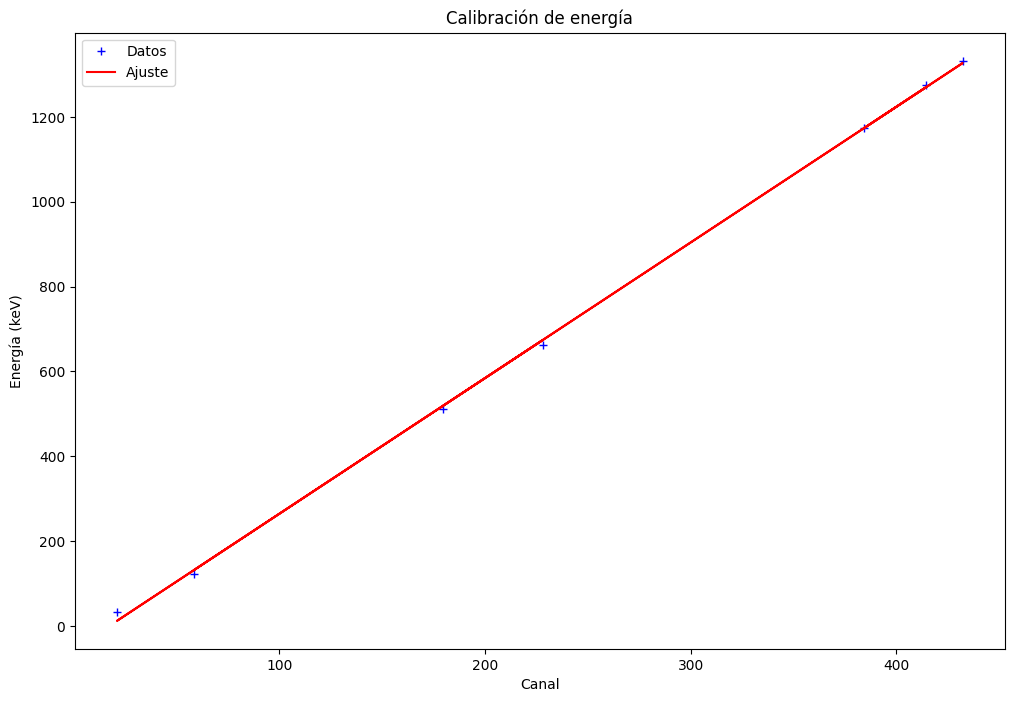

In [11]:
# Punto 2: Calibración de energía

# Extraer las columnas "mu" y "E"
x = df["mu"]
y = df["E"]

# Aplicar linregress para obtener los coeficientes de la recta de ajuste
b1, b0, r_value, p_value, std_err = linregress(x, y)

# Imprimir los coeficientes de la recta de ajuste
print(f"b0 = {b0:.2f}")
print(f"b1 = {b1:.2f}")

# Calibrar los valores de los canales del eje x de los espectros
x_calibrado = b0 + b1 * x_values_22Na # Utilizar x_calibrado en lugar de x_values en los gráficos y cálculos posteriores unidades en keV

print(f"El error relativo de la calibración es: {std_err/b1:.2f}")
# Utilizar x_calibrado en lugar de x_values en los gráficos y cálculos posteriores

# Calcula las incertidumbres de los parámetros de la recta de ajuste
delta_slope = std_err / np.sqrt(len(x))
delta_intercept = delta_slope * np.sqrt(np.mean(x**2))

# Muestra los valores de las incertidumbres
print("Resultados de los parametros de la recta de ajuste:")
print(f"a0 (keV)\ta1(keV/canal)")
print(f"{b0:.2f} +/- {delta_intercept:.2f}\t{b1:.2f} +/- {delta_slope:.2f}")

# Grafica los datos y la recta de ajuste Es solo para visualizaciòn no se pide mostrar en el informe
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'b+', label='Datos')
plt.plot(x, b0 + b1 * x, 'r-', label='Ajuste')
plt.legend()
plt.title('Calibración de energía')
plt.xlabel('Canal')
plt.ylabel('Energía (keV)')
plt.savefig('A2_calibracion.png')
plt.show()

In [16]:
# Punto 3: Verificación de la calibración

# Crear una tabla con los valores de Canal, E gamma propuesta, E gamma, Delta E gamma, %, FWHM

# Definir los valores de Canal y E gamma propuesta
canal = [max_x_22Na_e, max_x_22Na, max_x_60Co_1, max_x_60Co_2, max_x_137Cs_1, max_x_137Cs_2, max_x_57Co_1]  
e_propuesta = [p_electron, p_22Na_1, p_60Co_1, p_60Co_2, p_137Cs_alfa, p_137Cs_1, p_57Co_1]

# Calcular los valores de E gamma, Delta E gamma, % y FWHM
e_gamma = [b0 + b1 * c for c in canal]
delta_e_gamma = [e_propuesta[i] - e_gamma[i] for i in range(len(canal))]
porcentaje = [100 * delta_e_gamma[i] / e_gamma[i] for i in range(len(canal))]
fwhm_canal = [fwhm_22Na_2, fwhm_22Na_1, fwhm_60Co_1, fwhm_60Co_2, fwhm_137Cs_1, fwhm_137Cs_2, fwhm_57Co_1]
fwhm_calibrado = [b1 * fwhm_canal[i] for i in range(len(fwhm_canal))]

# Crear el diccionario con los datos y crear el dataframe
data_4 = {'Canal (Experimental)': canal, 'E gamma propuesta (keV)': e_propuesta, 'E gamma (keV)': e_gamma, 'Delta E gamma': delta_e_gamma, '%': porcentaje, 'FWHM (keV)': fwhm_calibrado}
df = pd.DataFrame(data_4)

# Mostrar el dataframe
print(df)

   Canal (Experimental)  E gamma propuesta (keV)  E gamma (keV)  \
0                 179.0                511.00000     517.065498   
1                 416.0               1274.53700    1274.740869   
2                 384.0               1173.22800    1172.438710   
3                 433.0               1332.49000    1329.088892   
4                  21.0                 32.06000      11.948583   
5                 228.0                661.65700     673.715680   
6                  59.0                122.06065     133.432398   

   Delta E gamma           %  FWHM (keV)  
0      -6.065498   -1.173062   70.332735  
1      -0.203869   -0.015993   44.757195  
2       0.789290    0.067320   86.317447  
3       3.401108    0.255898   83.120505  
4      20.111417  168.316326    9.590827  
5     -12.058680   -1.789877   54.348022  
6     -11.371748   -8.522479   25.575540  


Parametros ajuste: 7.9, 1.9 (c_0,c_1)
Error de c0: 15.4
Error de c1: 0.6
c0 (keV)	c1 (sqrt(keV)
7.9 +/- 15.4043	1.9 +/- 0.5700


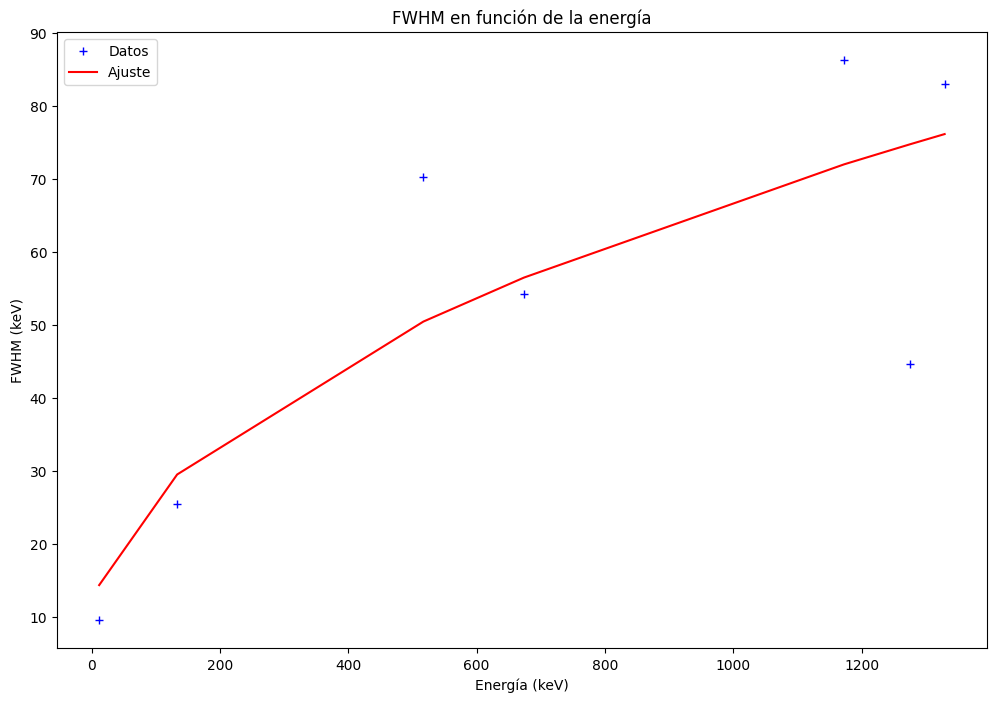

In [19]:
# punto 4: FWHM en funcion de la energia

# Punto 4.a: Ajuste de la funcion de FWHM vs E

def fwhm_ajuste(x, a, b):
    return a + b*np.sqrt(x)

x_values_feadj = np.array(df["E gamma (keV)"])
y_values_feadj = np.array(df["FWHM (keV)"])

# Get the sorted indices
sorted_indices = np.argsort(x_values_feadj)

# Use the sorted indices to sort the arrays
x_values_feadjs = x_values_feadj[sorted_indices]
y_values_feadjs = y_values_feadj[sorted_indices]

popt, pcov = curve_fit(fwhm_ajuste, x_values_feadjs, y_values_feadjs, p0=[1, 1])
c0 = popt[0]
c1 = popt[1]

print(f"Parametros ajuste: {popt[0]:.1f}, {popt[1]:.1f} (c_0,c_1)")

# Calculo de los errores de c0 y c1
delta_c0 = np.sqrt(pcov[0,0])
delta_c1 = np.sqrt(pcov[1,1])

print(f"Error de c0: {delta_c0:.1f}")
print(f"Error de c1: {delta_c1:.1f}")

# Tabla de resultados

print("c0 (keV)\tc1 (sqrt(keV)")
print(f"{c0:.4f} +/- {delta_c0:.1f}\t{c1:.4f} +/- {delta_c1:.1f}")

plt.figure(figsize=(12, 8))
plt.plot(x_values_feadjs, y_values_feadjs, 'b+', label='Datos')
plt.plot(x_values_feadjs, fwhm_ajuste(x_values_feadjs, *popt), 'r-', label='Ajuste')
plt.legend()
plt.title('FWHM en función de la energía')
plt.xlabel('Energía (keV)')
plt.ylabel('FWHM (keV)')
plt.savefig('A4_FWHM_vs_E.png')
plt.show()


In [18]:
# Punto 5: Ajuste de picos de 57Co